In [35]:
%pylab inline
from skimage import io
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [36]:
image = io.imread('uploads/df947b7905ec613a239a1c4d531e8eab45ccbd6d.jpg')

In [37]:
from skimage.transform import rescale
small = rescale(image, 0.1)

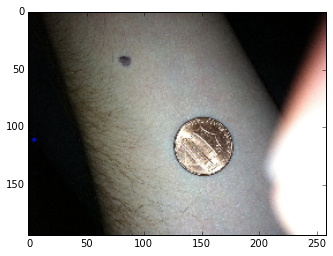

In [38]:
imshow(small)

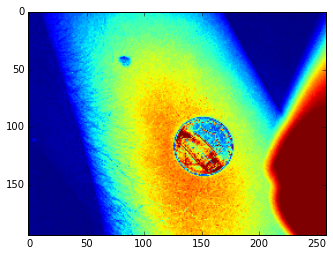

In [39]:
from skimage.color import rgb2gray
gray = rgb2gray(small)
imshow(gray)

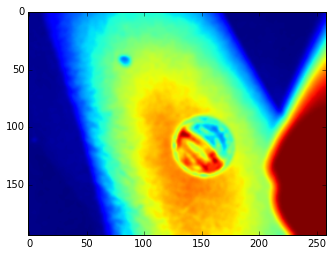

In [40]:
from skimage.filters import gaussian_filter
blurry = gaussian_filter(gray, 1.5)
imshow(blurry)

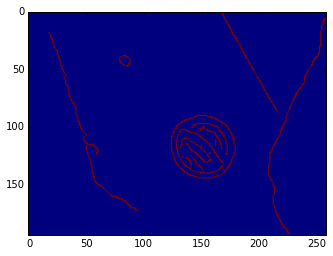

In [47]:
from skimage.feature import canny
edges = canny(gray, sigma=2)
imshow(edges)

In [48]:
from skimage.transform import hough_circle

hough_radii = np.arange(15, 30)
hough_res = hough_circle(edges, hough_radii)

In [122]:
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter
from skimage.color import gray2rgb

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 2
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

coin_center = 0
coin_radius = 0
    
# Draw the most prominent 5 circles
gray_copy = gray2rgb(gray)
for idx in np.argsort(accums)[::-1][:1]:
    coin_center = centers[idx]
    center_x, center_y = centers[idx]
    coin_radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    gray_copy[cy, cx] = (220, 20, 20)

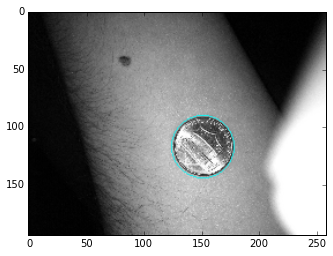

In [53]:
imshow(gray_copy)

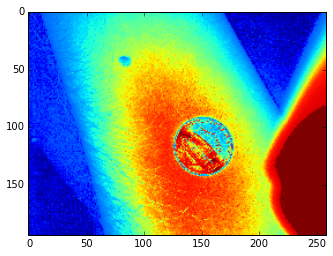

In [55]:
from skimage.exposure import equalize_hist

equal = equalize_hist(gray)
imshow(equal)

In [56]:
y,x = np.ogrid[:gray.shape[0],:gray.shape[1]]
cx = 90
cy = 45
radius = 30
r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)

mask = r2 <= radius * radius


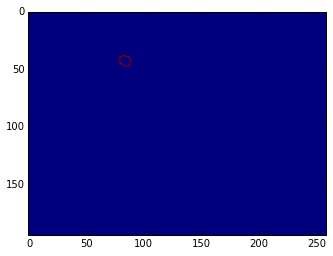

In [57]:
from skimage.feature import canny

mole_edge = canny(equal, sigma=2, mask=mask)
imshow(mole_edge)

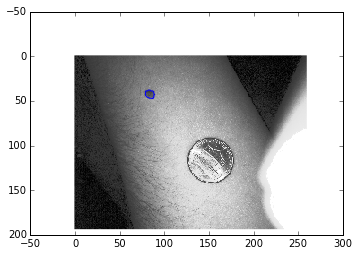

In [99]:
from skimage.measure import find_contours
contours = find_contours(mole_edge, 0.9, fully_connected='high')

fig, ax = plt.subplots()
ax.imshow(equal, interpolation='nearest', cmap=plt.cm.gray)

ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=1)

In [64]:
from mahotas.polygon import fill_polygon
from skimage.transform import resize

canvas = np.zeros((gray.shape[0], gray.shape[1]))
fill_polygon(contours[0].astype(np.int), canvas)

In [78]:
import numpy.ma as ma
from skimage.color import rgb2hsv

hsv = rgb2hsv(small)

deviations = []
for color in (0,1,2):
    masked = ma.array(hsv[:,:,color], mask=~canvas.astype(np.bool))
    deviations.append(masked.std())
    
print(deviations)

[0.24497806590678006, 0.051157599482450827, 0.090721389305638056]


In [104]:
from skimage.measure import CircleModel

circle_model = CircleModel()
circle_model.estimate(contours[0])
symmetry = circle_model.residuals(contours[0]).mean()
print(symmetry)

-4.22007751741e-11


In [125]:
diameter = (19.05 / coin_radius) * (circle_model.params[2])
print(circle_model.params)
print(diameter )

[ 42.56509846  83.78856377   4.92419268]
3.47429150024


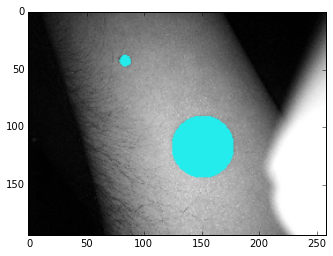

In [127]:
from skimage.draw import circle
from skimage.color import gray2rgb
gray_copy = gray2rgb(gray)
cx, cy = circle(circle_model.params[1], circle_model.params[0], circle_model.params[2])
gray_copy[cy, cx] = (220, 20, 20)
center_x, center_y = coin_center
cx, cy = circle(center_y, center_x, coin_radius)
gray_copy[cy, cx] = (220, 20, 20)
imshow(gray_copy)